# Chapter 3: Processing Raw Text

## 3.1 Accessing Data

I'm unlikely to be downloading a book anytime soon, and RSS feeds are a thing of the past, so we are now looking at downloading a webpage and webs craping. 

### Dealing with HTML
1. The `urllib.urlopen()` method is now deprecated. We need to use `urllib.request.urlopen()`
2. With all the markup in webpages, the best thing to do is to use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to parse and extract the text data.

In [1]:
import nltk
import urllib
from bs4 import BeautifulSoup

Here's a random article from the Guardian that I want to parse: [Can a pet bunny be happy?](https://www.theguardian.com/world/shortcuts/2019/oct/14/not-cross-bunnies-can-pet-rabbit-be-happy). This page has so much markup that even BeautifulSoup can be a little daunted. `get_text()` does not work!

In [10]:
url = "https://www.theguardian.com/world/shortcuts/2019/oct/14/not-cross-bunnies-can-pet-rabbit-be-happy"
html = urllib.request.urlopen(url).read()

In [26]:
soup = BeautifulSoup(html, 'html.parser')

In [39]:
raw = ' '.join([p.string for p in soup.find_all('p') if p.string is not None])

Now we can tokenize using NLTK:

In [44]:
tokens = nltk.word_tokenize(raw)
print(tokens)

['A', 'study', 'of', 'more', 'than', '6,000', 'rabbits', 'treated', 'by', 'vets', 'has', 'found', 'that', 'many', 'lead', 'sad', 'lives', '.', 'Here', '’', 's', 'how', 'to', 'make', 'sure', 'they', 'stay', 'healthy', 'and', 'avoid', 'loneliness', 'Thanks', 'to', 'generations', 'of', 'stories', 'featuring', 'rabbits', ',', 'and', 'their', 'sweet', ',', 'cuddly', 'appearance', ',', 'they', 'have', 'long', 'been', 'a', 'popular', 'children', '’', 's', 'pet', 'but', ',', 'says', 'Dan', 'O', '’', 'Neill', ',', 'senior', 'lecturer', 'in', 'companion', 'animal', 'epidemiology', 'at', 'the', 'Royal', 'Veterinary', 'College', ',', 'and', 'co-author', 'of', 'the', 'study', ',', '“', 'they', 'are', 'not', 'a', 'good', 'child', '’', 's', 'pet', 'at', 'all.', '”', 'They', 'are', 'a', 'prey', 'animal', '–', 'constantly', 'alert', 'to', 'danger', '–', 'so', 'being', 'handled', 'by', 'a', 'noisy', 'child', 'can', 'be', 'stressful', ',', 'especially', 'if', 'they', 'are', 'not', 'used', 'to', 'it', '('

We can now normalize and sort:

In [46]:
words = [w.lower() for w in tokens]
vocab = sorted(set(words))
print(vocab)

['(', ')', ',', '.', '6,000', '?', 'a', 'alert', 'all.', 'an', 'and', 'animal', 'annual', 'appearance', 'are', 'around', 'at', 'avoid', 'aware', 'be', 'because', 'become', 'been', 'being', 'bits', 'bulk', 'but', 'by', 'can', 'checkups', 'chewing', 'child', 'children', 'co-author', 'college', 'companion', 'constantly', 'continuously', 'cuddly', 'cure.', 'dan', 'danger', 'deal', 'designed', 'diet', 'digest', 'easier', 'eat', 'encourages', 'epidemiology', 'especially', 'evolved', 'exercise', 'faeces', 'favourite', 'featuring', 'food', 'for', 'found', 'friend', 'generations', 'give', 'good', 'got', 'grass', 'grow', 'handled', 'hard', 'has', 'have', 'hay', 'health', 'healthy', 'here', 'hide', 'how', 'if', 'illness', 'in', 'issues', 'it', 'lead', 'lecturer', 'life', 'lives', 'loneliness', 'long', 'make', 'management', 'many', 'mimic', 'more', 'muesli-type', 'nature', 'need', 'neill', 'noisy', 'not', 'o', 'obesity', 'of', 'only', 'or', 'overgrow', 'pet', 'physical', 'plays', 'popular', 'prey'

## 3.3 Text Processing with Unicode
Let's try the example given in the book. First download the piece of Polish text and then render and explore it.

In [47]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

import codecs
f = codecs.open(path, encoding='latin2')

In [48]:
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

b'Pruska Biblioteka Pa\\u0144stwowa. Jej dawne zbiory znane pod nazw\\u0105'
b'"Berlinka" to skarb kultury i sztuki niemieckiej. Przewiezione przez'
b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y'
b'odnalezione po 1945 r. na terytorium Polski. Trafi\\u0142y do Biblioteki'
b'Jagiello\\u0144skiej w Krakowie, obejmuj\\u0105 ponad 500 tys. zabytkowych'
b'archiwali\\xf3w, m.in. manuskrypty Goethego, Mozarta, Beethovena, Bacha.'


Python `print` statement assumes a default encoding of the Unicode character, which is now utf-8. We Now specify that `print` should use the `repr()` of the string, which outputs the UTF-8 escape sequences (of the form `\xXX`) rather than trying to render the glyphs.

In [49]:
nacute = u'\u0144'
nacute

'ń'

In [50]:
nacute_utf = nacute.encode('utf8')
print(repr(nacute_utf))

b'\xc5\x84'


The module `unicodedata` lets us inspect the properties of Unicode characters. Here we select all characters in the 3rd line of the Polish text outside the ASCII range and print their UTF-8 escaped value, followed by their code point integer.

In [52]:
import unicodedata
lines = codecs.open(path, encoding='latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))

b'Niemc\\xf3w pod koniec II wojny \\u015bwiatowej na Dolny \\u015al\\u0105sk, zosta\\u0142y\\n'


In [55]:
for c in line:
    if ord(c) > 127:
        print('%s %s U+%04x %s' % (c, c.encode('utf8'), ord(c), unicodedata.name(c)))

ó b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
ś b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
Ś b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
ą b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
ł b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


With Python 3.6+ we don't need to worry about encoding since the default is UTF-8. We can tokenize just as for ASCII strings.

In [58]:
line = line.lower()
print(line)
print(nltk.word_tokenize(line))

niemców pod koniec ii wojny światowej na dolny śląsk, zostały

['niemców', 'pod', 'koniec', 'ii', 'wojny', 'światowej', 'na', 'dolny', 'śląsk', ',', 'zostały']


## 3.4 Regular Expressions for Detecting Word Patterns
Let's use the Word Corpus for data.

In [59]:
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

### Using Basic Metacharacters
1. Find words ending with `ed` using the regular expression `ed$` using the `re.search(p, s)` function

In [60]:
print([w for w in wordlist if re.search('ed$', w)][:20])

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded', 'absorbed', 'abstracted', 'abstricted', 'accelerated', 'accepted', 'accidented', 'accoladed', 'accolated', 'accomplished', 'accosted']


Wildcard symbol `.` matches any single character. Suppose we have an eight letter word with `j` as its third letter and `t` as its sixth letter.

In [61]:
print([w for w in wordlist if re.search('^..j..t..$', w)])

['abjectly', 'adjuster', 'dejected', 'dejectly', 'injector', 'majestic', 'objectee', 'objector', 'rejecter', 'rejector', 'unjilted', 'unjolted', 'unjustly']


If we forget the `^` caret and `$` then it will match all words where `j` and `t` are spaced three letters apart.

In [63]:
print([w for w in wordlist if re.search('..j..t..', w)][:10])

['abjectedness', 'abjection', 'abjective', 'abjectly', 'abjectness', 'adjection', 'adjectional', 'adjectival', 'adjectivally', 'adjective']


### Ranges and Closures
Regular expression `^[ghi][mno][jlk][def]$`: 

This matches a 4-character word.
1. `[^[ghi]` matches the start of a word followed by `g`, `h`, or `i`.
2. `[mno]` constrain the second character to be `m`, `n`, or `o`.

The third and fourth characters are also constrained. Note that the order of characters inside the square brackets is not significant.

In [64]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

['gold', 'golf', 'hold', 'hole']

Other searches:
* `^[ghijklmno]+`, or more concisely `^[g-o]+` will match all words that starts with any of the characters in the square bracket
* `^[a-fj-o]+` will match words that starting with `a`,`b`,`c`,`d`,`e` or `f` and any letters between `j-o`.

`+` will match one or more of an item:

In [17]:
# Explore the + symbol
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
print([w for w in chat_words if re.search('^m+i+n+e+$', w)])

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee', 'miiiiiinnnnnnnnnneeeeeeee', 'mine', 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']


In [16]:
print([w for w in chat_words if re.search('^[ha]+$', w)])

['a', 'aaaaaaaaaaaaaaaaa', 'aaahhhh', 'ah', 'ahah', 'ahahah', 'ahh', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'h', 'ha', 'haaa', 'hah', 'haha', 'hahaaa', 'hahah', 'hahaha', 'hahahaa', 'hahahah', 'hahahaha', 'hahahahaaa', 'hahahahahaha', 'hahahahahahaha', 'hahahahahahahahahahahahahahahaha', 'hahahhahah', 'hahhahahaha']


`^` charet inside a square bracket means exclusion

In [38]:
# Find all words that are not vowels
print([w for w in chat_words if re.search('^[^aeiouAEIOU\W\d]+$', w)][:5])

['B', 'C', 'CDT', 'CST', 'CT']


In [26]:
wsj = sorted(set(nltk.corpus.treebank.words()))
print([w for w in wsj if re.search('^[0-9]+\.[0-9]+', w)][:10])

['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5']


In [27]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)]

['C$', 'US$']

In [29]:
# Four digit numbers
print([w for w in wsj if re.search('^[0-9]{4}$', w)])

['1614', '1637', '1787', '1901', '1903', '1917', '1925', '1929', '1933', '1934', '1948', '1953', '1955', '1956', '1961', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1975', '1976', '1977', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2005', '2009', '2017', '2019', '2029', '3057', '8300']


Start with digits separated by a hyphen and then three to five lowercase letters

In [30]:
print([w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)])

['10-day', '10-lap', '10-year', '100-share', '12-point', '12-year', '14-hour', '15-day', '150-point', '190-point', '20-point', '20-stock', '21-month', '237-seat', '240-page', '27-year', '30-day', '30-point', '30-share', '30-year', '300-day', '36-day', '36-store', '42-year', '50-state', '500-stock', '52-week', '69-point', '84-month', '87-store', '90-day']


More than 5 lowercase letters separated by a hyphen, then two or three lower case letters,
separated by a hyphen, then at most 6 lowercase letters

In [31]:
print([w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)])

['black-and-white', 'bread-and-butter', 'father-in-law', 'machine-gun-toting', 'savings-and-loan']


Round brackets with vertical pipe means `or`

In [37]:
# words ending in 'ed' or ' ing'
print([w for w in wsj if re.search('(ed|ing)$', w)][:6])

['62%-owned', 'Absorbed', 'According', 'Adopting', 'Advanced', 'Advancing']


## 3.5 Useful Applications of Regular Expressions

### Extracting Word Pieces

In [40]:
# Extracting all word pieces
word = 'supercalifragilisticexpialidocious'
print(re.findall(r'[aeiou]', word))

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']


In [65]:
# Look for sequences of two or more vowels in some text, then determine their relative frequency
wsj = sorted(set(nltk.corpus.treebank.words()))
fd = nltk.FreqDist(vs for word in wsj for vs in re.findall(r'[aeiou]{2,}', word))

In [66]:
fd.items()

dict_items([('ea', 476), ('oi', 65), ('ou', 329), ('io', 549), ('ee', 217), ('ie', 331), ('ui', 95), ('ua', 109), ('ai', 261), ('ue', 105), ('ia', 253), ('ei', 86), ('iai', 1), ('oo', 174), ('au', 106), ('eau', 10), ('oa', 59), ('oei', 1), ('oe', 15), ('eo', 39), ('uu', 1), ('eu', 18), ('iu', 14), ('aii', 1), ('aiia', 1), ('ae', 11), ('aa', 3), ('oui', 6), ('ieu', 3), ('ao', 6), ('iou', 27), ('uee', 4), ('eou', 5), ('aia', 1), ('uie', 3), ('iao', 1), ('eei', 2), ('uo', 8), ('uou', 5), ('eea', 1), ('ueui', 1), ('ioa', 1), ('ooi', 1)])

### Doing More with Word Pieces
Glue them back together or plot them.

In [67]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]' # pieces that starts or ends with a vowel or consonant

In [68]:
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

In [69]:
english_udhr = nltk.corpus.udhr.words('English-Latin1')

In [70]:
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


#### Words of Rotokas

In [71]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')

In [72]:
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


To inspect the words behind the numbers in that table, it would be useful to have an index that allows us to quickly find the list of words that contains a given consonant-vowel pair. 

In [73]:
cv_word_pairs = [(cv, w) for w in rotokas_words
                         for cv in re.findall(r'[ptksvr][aeiou]', w)]
cv_index = nltk.Index(cv_word_pairs)
cv_index['su']

['kasuari']

In [74]:
print(cv_index['po'])

['kaapo', 'kaapopato', 'kaipori', 'kaiporipie', 'kaiporivira', 'kapo', 'kapoa', 'kapokao', 'kapokapo', 'kapokapo', 'kapokapoa', 'kapokapoa', 'kapokapora', 'kapokapora', 'kapokaporo', 'kapokaporo', 'kapokari', 'kapokarito', 'kapokoa', 'kapoo', 'kapooto', 'kapoovira', 'kapopaa', 'kaporo', 'kaporo', 'kaporopa', 'kaporoto', 'kapoto', 'karokaropo', 'karopo', 'kepo', 'kepoi', 'keposi', 'kepoto']


### Finding Word Stems

In [57]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ivs|es|s|ment)$', 'processing')

[('process', 'ing')]

The non-greedy version of the star operator is `*?`

In [75]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ivs|es|s|ment)$', 'processes')

[('process', 'es')]

We have a problem if there are words that satisfy the pattern but shouldn't be broken. 

In [61]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$', 'speed')

[('spe', 'ed')]

In [62]:
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

In [63]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government. Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

In [65]:
tokens = nltk.word_tokenize(raw)
print([stem(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'women', 'ly', 'in', 'pond', 'distribut', 'sword', 'i', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'Supreme', 'execut', 'power', 'deriv', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


### Searching Tokenized Text
Can use a special kind of regular expression for searching across multiple words in a text

In [76]:
from nltk.corpus import gutenberg, nps_chat

In [77]:
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))

In [78]:
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [79]:
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>")

you rule bro; telling you bro; u twizted bro


In [82]:
chat.findall(r"<l.*>{3,}")

lol lol lol; lmao lol lol; lol lol lol; la la la la la; la la la; la
la la; lovely lol lol love; lol lol lol.; la la la; la la la


In [80]:
from nltk.corpus import brown
hobbies_learned = nltk.Text(brown.words(categories=['hobbies', 'learned']))

In [81]:
hobbies_learned.findall(r"<\w*> <and> <other> <\w*s>")

speed and other activities; water and other liquids; tomb and other
landmarks; Statues and other monuments; pearls and other jewels;
charts and other items; roads and other features; figures and other
objects; military and other areas; demands and other factors;
abstracts and other compilations; iron and other metals


## 3.6 Normalizing Text

## 3.7 Regular Expressions for Tokenizing Text

In [73]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone 
though), 'I won't have any pepper in my kitchen AT ALL. Soup does very 
well without--Maybe it's always pepper that makes people hot-tempered,'..."""

In [75]:
print(re.split(r' ', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', '\nthough),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', '\nwell', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [77]:
print(re.split(r'[ \t\n]+', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'..."]


In [78]:
print(re.split(r'\W+', raw))

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


In [81]:
print(re.findall(r'\w+|\S\w*', raw))

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered', ',', "'", '.', '.', '.']


In [82]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'", '...']


#### NLTK's Regular Expression Tokenizer

In [2]:
text = 'That U.S.A. poster-print costs $12.40...'

In [3]:
pattern = r'''(?x)
(?:[A-Z]\.)+
|\w+(?:[-]\w+)*
|\$?\d+(?:\.\d+)?%?
|\.\.\.
|[][.,;"'?():-_`]
'''

In [4]:
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

## 3.8 Sentence Segmentation
### Sentence Segmentation
NLTK includes the Punkt sentence segmenter [Kiss & Strunk 2006](https://www.aclweb.org/anthology/J06-4003/)

In [4]:
import pprint

In [5]:
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = sent_tokenizer.tokenize(text)
pprint.pprint(sents[171:181])

['In the wild events which were to follow this girl had no\n'
 'part at all; he never saw her again until all his tale was over.',
 'And yet, in some indescribable way, she kept recurring like a\n'
 'motive in music through all his mad adventures afterwards, and the\n'
 'glory of her strange hair ran like a red thread through those dark\n'
 'and ill-drawn tapestries of the night.',
 'For what followed was so\nimprobable, that it might well have been a dream.',
 'When Syme went out into the starlit street, he found it for the\n'
 'moment empty.',
 'Then he realised (in some odd way) that the silence\n'
 'was rather a living silence than a dead one.',
 'Directly outside the\n'
 'door stood a street lamp, whose gleam gilded the leaves of the tree\n'
 'that bent out over the fence behind him.',
 'About a foot from the\n'
 'lamp-post stood a figure almost as rigid and motionless as the\n'
 'lamp-post itself.',
 'The tall hat and long frock coat were black; the\n'
 'face, in an abrupt shadow

### We can also do this using SpaCy
Note that we get a completely different set of sentences. This is not surprising since we are using a completely different language model.

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
doc = nlp(text)
for i, sent in enumerate(doc.sents):
    if (i > 170) and (i < 181):
        print(sent.text)

"I beg your pardon ?" said Syme.


"Am I not serious about my anarchism ?" cried Gregory, with knotted
fists.


"My dear fellow!" said Syme, and strolled away.


With surprise, but with a curious pleasure, he found Rosamond
Gregory still in his company.


"Mr. Syme," she said, "do the people who talk like you and my
brother often mean what they say ?
Do you mean what you say now ?"


Syme smiled.


"Do you ?"
he asked.


"What do you mean ?" asked the girl, with grave eyes.




### Word Segmentation
In this book, segmentation is treated as a search problem: annotate each character with a boolean value and find the bit string that causes the text string to be correctly segmented into words. We assume the learner is acquiring words and storing them in a internal lexicon. Given a suitable lexicon, it is possible to reconstruct the source text as a sequence of lexical items.

We can define an **objective function**, a scoring function whose value we will try to optimise, based on the size of lexicon and the amount of information needed to reconstruct the source text from the lexicon:
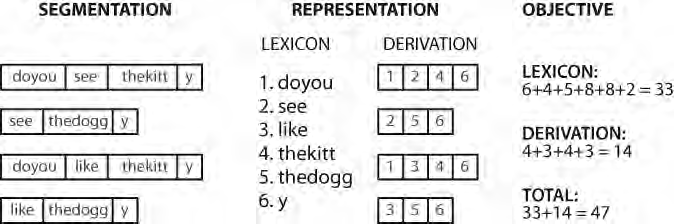